In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

In [46]:
data_df=pd.read_csv(r'C:\Users\ROBERTECH\Desktop\Backup 2\3MTT\new project.csv')
data_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
new_data = data_df.drop('region', axis = 1)
new_data

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [8]:
new_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

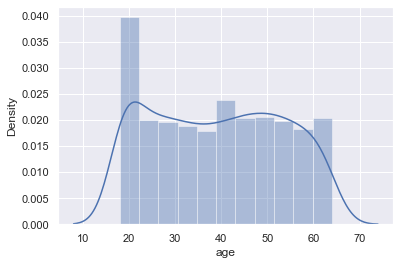

In [9]:
sns.distplot(new_data['age'])

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

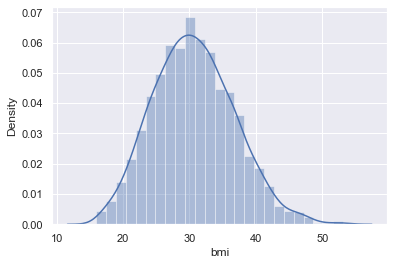

In [10]:
sns.distplot(new_data['bmi'])

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='children', ylabel='Density'>

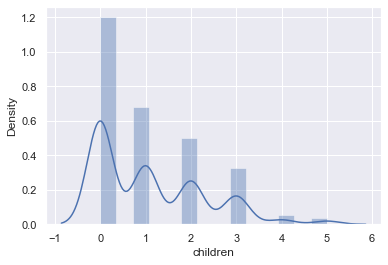

In [11]:
sns.distplot(new_data['children'])

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

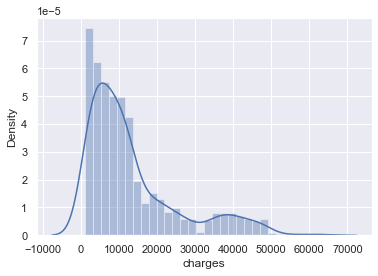

In [12]:
sns.distplot(new_data['charges'])

In [13]:
data_dummy=new_data.copy()

In [14]:
log_charges = np.log(data_dummy['charges'])
data_dummy['log_charges']=log_charges
data_dummy


,age,sex,bmi,children,smoker,charges,log_charges
0,19,female,27.900,0,yes,16884.92400,9.734176
1,18,male,33.770,1,no,1725.55230,7.453302
2,28,male,33.000,3,no,4449.46200,8.400538
3,33,male,22.705,0,no,21984.47061,9.998092
4,32,male,28.880,0,no,3866.85520,8.260197
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,9.268661
1334,18,female,31.920,0,no,2205.98080,7.698927
1335,18,female,36.850,0,no,1629.83350,7.396233
1336,21,female,25.800,0,no,2007.94500,7.604867


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_charges', ylabel='Density'>

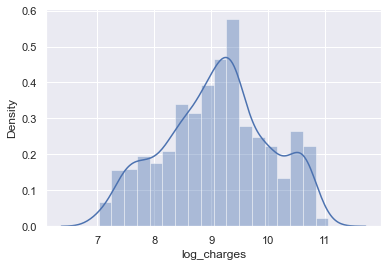

In [15]:
sns.distplot(data_dummy['log_charges'])

In [16]:
data_dummy['children']
threshold=1

In [17]:
data_dummy['children']=data_dummy['children'].apply(lambda x : 1
                                                        if x>= threshold else 0)
data_dummy

,age,sex,bmi,children,smoker,charges,log_charges
0,19,female,27.900,0,yes,16884.92400,9.734176
1,18,male,33.770,1,no,1725.55230,7.453302
2,28,male,33.000,1,no,4449.46200,8.400538
3,33,male,22.705,0,no,21984.47061,9.998092
4,32,male,28.880,0,no,3866.85520,8.260197
...,...,...,...,...,...,...,...
1333,50,male,30.970,1,no,10600.54830,9.268661
1334,18,female,31.920,0,no,2205.98080,7.698927
1335,18,female,36.850,0,no,1629.83350,7.396233
1336,21,female,25.800,0,no,2007.94500,7.604867


In [18]:
data_dummy['age']
threshold=40

In [19]:
data_dummy['age']=data_dummy['age'].apply(lambda x : 1
                                        if x>= threshold else 0)
data_dummy

,age,sex,bmi,children,smoker,charges,log_charges
0,0,female,27.900,0,yes,16884.92400,9.734176
1,0,male,33.770,1,no,1725.55230,7.453302
2,0,male,33.000,1,no,4449.46200,8.400538
3,0,male,22.705,0,no,21984.47061,9.998092
4,0,male,28.880,0,no,3866.85520,8.260197
...,...,...,...,...,...,...,...
1333,1,male,30.970,1,no,10600.54830,9.268661
1334,0,female,31.920,0,no,2205.98080,7.698927
1335,0,female,36.850,0,no,1629.83350,7.396233
1336,0,female,25.800,0,no,2007.94500,7.604867


In [20]:
data_dummy['sex']=data_dummy['sex'].map({'male':1,'female':0})
data_dummy['smoker']=data_dummy['smoker'].map({'yes':1,'no':0})
data_dummy

,age,sex,bmi,children,smoker,charges,log_charges
0,0,0,27.900,0,1,16884.92400,9.734176
1,0,1,33.770,1,0,1725.55230,7.453302
2,0,1,33.000,1,0,4449.46200,8.400538
3,0,1,22.705,0,0,21984.47061,9.998092
4,0,1,28.880,0,0,3866.85520,8.260197
...,...,...,...,...,...,...,...
1333,1,1,30.970,1,0,10600.54830,9.268661
1334,0,0,31.920,0,0,2205.98080,7.698927
1335,0,0,36.850,0,0,1629.83350,7.396233
1336,0,0,25.800,0,0,2007.94500,7.604867


In [21]:
refined = data_dummy.drop('charges', axis = 1)
refined

,age,sex,bmi,children,smoker,log_charges
0,0,0,27.900,0,1,9.734176
1,0,1,33.770,1,0,7.453302
2,0,1,33.000,1,0,8.400538
3,0,1,22.705,0,0,9.998092
4,0,1,28.880,0,0,8.260197
...,...,...,...,...,...,...
1333,1,1,30.970,1,0,9.268661
1334,0,0,31.920,0,0,7.698927
1335,0,0,36.850,0,0,7.396233
1336,0,0,25.800,0,0,7.604867


In [22]:
#Declare inputs and targets

In [23]:
data_preprocessed = refined.copy()
targets=data_preprocessed['log_charges']
inputs=data_preprocessed.drop(['log_charges'], axis=1)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [25]:
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[-0.99255388, -1.0105187 , -0.45332   , -1.15369426,  1.97058663],
       [-0.99255388,  0.98959079,  0.5096211 ,  0.86678077, -0.5074631 ],
       [-0.99255388,  0.98959079,  0.38330685,  0.86678077, -0.5074631 ],
       ...,
       [-0.99255388, -1.0105187 ,  1.0148781 , -1.15369426, -0.5074631 ],
       [-0.99255388, -1.0105187 , -0.79781341, -1.15369426, -0.5074631 ],
       [ 1.00750198, -1.0105187 , -0.26138796, -1.15369426,  1.97058663]])

In [26]:
#Test Train Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,targets,test_size = 0.2, random_state=365)

In [27]:
original_charges = np.exp(log_charges)

In [28]:
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [29]:
y_hat=reg.predict(x_train)

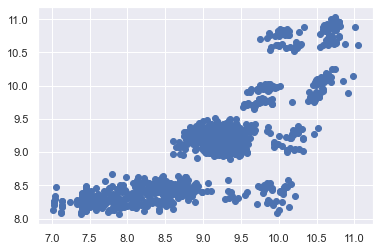

In [30]:
plt.scatter(y_train, y_hat)
plt.show()

In [31]:
reg.score(x_train, y_train)

0.6784636402027788

In [32]:
reg.intercept_

9.100385065497193

In [33]:
reg.coef_

array([ 0.41392487, -0.0264331 ,  0.07031132,  0.11056906,  0.63135477])

In [34]:
reg_summary = pd.DataFrame([['intercept'],['age'],['sex'],['bmi'],['children'],['smoker']], columns =['Features'])
reg_summary['weights']=reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4]
reg_summary

,Features,weights
0,intercept,9.100385
1,age,0.413925
2,sex,-0.026433
3,bmi,0.070311
4,children,0.110569
5,smoker,0.631355


In [35]:
p_values = f_regression (x_train, y_train)[1]
p_values.round(3)

array([0.   , 0.742, 0.   , 0.   , 0.   ])

Text(0, 0.5, 'Actual Charges')

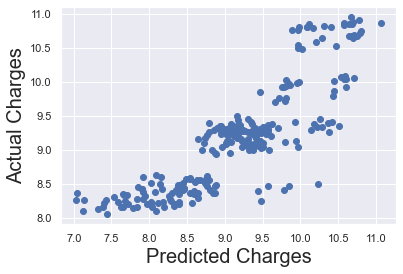

In [36]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_test, y_hat_test)
plt.xlabel('Predicted Charges',fontsize=20)
plt.ylabel('Actual Charges',fontsize=20)

In [37]:
Data_Pred =pd.DataFrame(y_hat_test, columns=['Prediction'])
Data_Pred

,Prediction
0,8.992327
1,8.230964
2,8.420729
3,9.297637
4,9.794455
...,...
263,9.378723
264,10.903804
265,10.803269
266,8.195020


In [38]:
Data_Pred['Target']=(y_test.reset_index(drop=True))
Data_Pred

,Prediction,Target
0,8.992327,9.578440
1,8.230964,7.591651
2,8.420729,7.904376
3,9.297637,9.028154
4,9.794455,10.426744
...,...,...
263,9.378723,9.074890
264,10.903804,10.768411
265,10.803269,9.984020
266,8.195020,8.339285


In [39]:
Data_Pred['Residual']= Data_Pred['Target'] - Data_Pred['Prediction']
Data_Pred['Residual']

0      0.586112
1     -0.639313
2     -0.516353
3     -0.269484
4      0.632290
         ...   
263   -0.303832
264   -0.135393
265   -0.819248
266    0.144265
267    0.278935
Name: Residual, Length: 268, dtype: float64

In [40]:
#difference percentage
Data_Pred['difference%'] = np.absolute(Data_Pred['Residual']/Data_Pred['Target']*100)
Data_Pred

,Prediction,Target,Residual,difference%
0,8.992327,9.578440,0.586112,6.119079
1,8.230964,7.591651,-0.639313,8.421271
2,8.420729,7.904376,-0.516353,6.532493
3,9.297637,9.028154,-0.269484,2.984924
4,9.794455,10.426744,0.632290,6.064114
...,...,...,...,...
263,9.378723,9.074890,-0.303832,3.348052
264,10.903804,10.768411,-0.135393,1.257316
265,10.803269,9.984020,-0.819248,8.205597
266,8.195020,8.339285,0.144265,1.729948


In [41]:
Data_Pred.describe()

,Prediction,Target,Residual,difference%
count,268.000000,268.000000,268.000000,268.000000
mean,9.150516,9.141897,-0.008619,3.731951
std,0.755424,0.866570,0.453852,3.434979
min,8.045841,7.036158,-1.310848,0.008348
25%,8.459902,8.562939,-0.277625,1.174492
50%,9.163754,9.161876,-0.050895,2.712761
75%,9.361453,9.678784,0.226083,5.043973
max,10.952925,11.063045,1.737635,18.601532
